# Модель Рашевского 

## Описание модели

В партии эсеров все $N$ участников разделились на две группы: левые ($L$) и правые ($R$). Партийные деятели активно взаимодействуют друг с другом, переманивая оппонентов на свою сторону. Пусть 

$$l = \frac{L}{N}$$

$$r = \frac{R}{N}$$

– доли левых и правых эсеров в партии. Пусть в момент разделения количество участников составляло $L_0$, $R_0$. Тогда динамику долей левых и правых эсеров в партии можно описать следующей системой дифференциальных уравнений:

$$l'(t) = a_0 l_0 - c_0 r_0 + a l(t) - c r(t)$$

$$r'(t) = c_0 r_0 - a_0 l_0 + c r(t) - a l(t)$$

где $a, a_0, c, c_0 \ge 0$.

## Реализация модели

Импортируем инструменты

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from dsolvemethods import CauchyProblem, RungeKutta, VectorFunction

Задаём параметры модели

In [2]:
a = 1
a_0 = 1
c = 3.1
c_0 = 3.1

Задаём начальные параметры

In [3]:
l_0 = 0.75
r_0 = 0.25

Задаём систему уравнений полагая

$$y = (l, r)^T$$

In [4]:
f = VectorFunction(
    [
        lambda t, y: a_0*l_0 - c_0*r_0 + a*y[0] - c*y[1], 
        lambda t, y: c_0*r_0 - a_0*l_0 + c*y[1] - a*y[0],
    ]
)

Задаём задачу Коши

In [5]:
model = CauchyProblem(f, 0.0, np.array([l_0, r_0]))

Инициализируем солвер и строим траектории  𝑦  для четырёх месяцев.

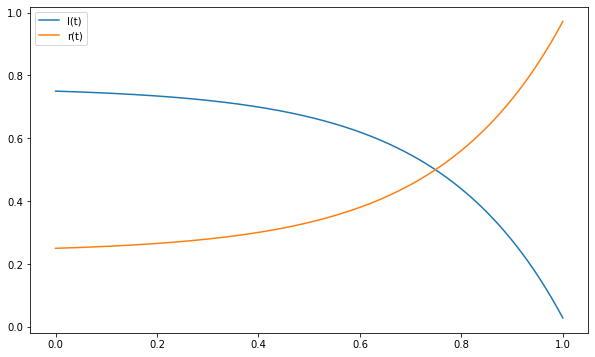

Wall time: 233 ms


In [6]:
%%time

days_in_four_month = 1
rk = RungeKutta(h=0.001)
args, values = rk.solve(model, days_in_four_month)

plt.figure(figsize=(10, 6))
plt.plot(args, values[:, 0], label='l(t)')
plt.plot(args, values[:, 1], label='r(t)')
plt.legend()
plt.show()

Посмотрим, к какому результату мы пришли

In [7]:
print(
    "Доля левых эсеров: {:10.4f}".format(values[-1, 0]), 
    "Доля левых эсеров: {:10.4f}".format(values[-1, 1]),
    sep='\n'
)

Доля левых эсеров:     0.0284
Доля левых эсеров:     0.9716
